In [1]:
# https://www.kaggle.com/c/home-credit-default-risk/data
# librairies importations 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# uploader the file application_test.csv
data1 = pd.read_csv('application_test.csv')
data1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Full Analysis of the dataframe
def Full_Analysis_df(data_frame,str1ng):
    Meta_df(data_frame,str1ng)
    Analysis_non_obj_df(data_frame)
    Hist_comp_non_obj_df(data_frame)
    Analysis_obj_df(data_frame)    
    return

# Analysis of the metadata of dataframe
def Meta_df(data_frame,str1ng):
    Meta_data = ((pd.DataFrame({'Filled values':pd.notnull(data_frame).sum(), 'Missing_values':pd.isnull(data_frame).sum()})
                 /(data_frame.shape[0]/100)).sort_values(by=['Missing_values'], ascending=False))
    (Meta_data.plot.bar(stacked=True,
                        figsize=(20,5),
                        title = 'Filled and missing values in % for {} with the shape {}'.format(str1ng,data_frame.shape),
                        fontsize = 14))
    return Meta_data

# Analysis of the columns containing objects
def Analysis_obj_df(data_frame):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    fig1 = plt.figure(figsize=(10, 10*Nb_col_data_frame_obj))
    icb = 1
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        plt.subplot(Nb_col_data_frame_obj,1,icb)
        data_frame_obj[col_data_frame_obj].value_counts()[:10].plot(kind='barh', 
                                                                    figsize=(10,10), 
                                                                    title = '{} with {} categories'.format(col_data_frame_obj,nb_cat_temp))
        plt.show()
        icb += 1
    return

# Analysis of the columns not containing objects
def Analysis_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object')
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    fig = plt.figure(figsize=(20, 1*Nb_col_data_frame_Nobj))
    ic = 1
    sns.set(font_scale = 1)
    for col_data_frame_Nobj in data_frame_Nobj:
        plt.subplot(Nb_col_data_frame_Nobj,1,ic)
        sns.boxplot(x=data_frame_Nobj[col_data_frame_Nobj])
        fig.subplots_adjust(hspace=2)
        ic += 1
    plt.show()
    return

# Function plotting histograms, distribution plots, mean and median for features containing numerical values
def Hist_comp_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object').dropna()
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    ih = 1
    for col_data_frame_Nobj in data_frame_Nobj:
        arr_temp = data_frame_Nobj[col_data_frame_Nobj]
        plt.figure(figsize=(6, 4))
        ax_temp = sns.distplot(arr_temp)
        plt.axvline(np.mean(arr_temp), color='b', linestyle='dashed', linewidth=3)
        plt.axvline(np.median(arr_temp), color='orange', linestyle='dashed', linewidth=3)
        plt.title('Distribution, Mean (blue), Median (orange) for the feature {}'.format(col_data_frame_Nobj))
        plt.show()
    return

# Function checking the boxplots of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Box_taget_cat(data_frame,target,cat_limit=30):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            cat_temp = sns.catplot(x=col_data_frame_obj,
                                   y=target,
                                   kind="box", 
                                   data=data_frame, 
                                   height = 4,
                                   aspect = 2)
            cat_temp.set_xticklabels(rotation=90)
            plt.show()
        else:
            continue
    return

# Function checking the mean and standard deviation of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Mean_std_target_cat(data_frame,target,cat_limit=30,fig_length=8,fig_height=4):
#    data_frame_obj = data_frame.select_dtypes(include='object')
    data_frame_obj = data_frame
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            list_temp = [col_data_frame_obj,target]
            mean_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).mean() 
            std_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).std()
            plt.figure(figsize=(fig_length, fig_height))
            plt.errorbar(mean_targ_cat.index, 
                         mean_targ_cat[target],
                         std_targ_cat[target], 
                         fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
            plt.xticks(rotation=90)
            plt.title('{}: Mean and Standard Dev. for each {}'.format(target,col_data_frame_obj))
        else:
            continue
    return

# Function checking the potential linear relationship between a target and features containing numerical values
def Target_Nobj_pairpl(data_frame,target):
    data_frame_Nobj = data_frame.drop(columns=target).select_dtypes(exclude='object')
    list_Nobj = list(data_frame_Nobj.columns)
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    min_list = np.arange(0,Nb_col_data_frame_Nobj,5).tolist()
    max_list = np.arange(5,Nb_col_data_frame_Nobj,5).tolist()
    l_min_list = len(min_list)
    l_max_list = len(max_list)
    if l_min_list > l_max_list:
        max_list.insert(l_min_list, Nb_col_data_frame_Nobj)
    else:
            pass
    for ia, ib in list(zip(min_list, max_list)):
#        print(ia,ib)
        pp_temp = sns.pairplot(data = data_frame,
                  y_vars=[target],
                  x_vars=list_Nobj[ia:ib], 
                  kind="reg", 
                  height = 3)    
    return

# Fonction filtering by default values between Q1-1.5IQR and Q3+1.5IQR: Outliers remover
def FilterIQR(data_frame,str1ng,kiqr=1.5):
    Q1 = data_frame[str1ng].quantile(0.25)
    Q3 = data_frame[str1ng].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (kiqr * IQR)
    high_limit = Q3 + (kiqr * IQR)
    data_frame = data_frame.drop(data_frame[(data_frame[str1ng] > high_limit) 
                                                           | (data_frame[str1ng] < low_limit)].index)
    return data_frame

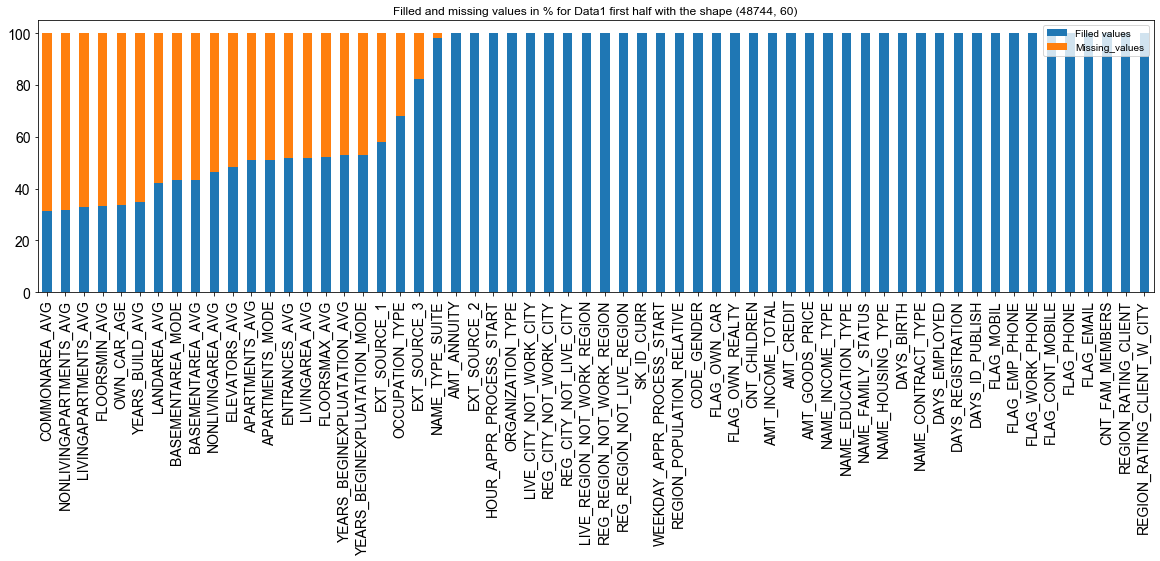

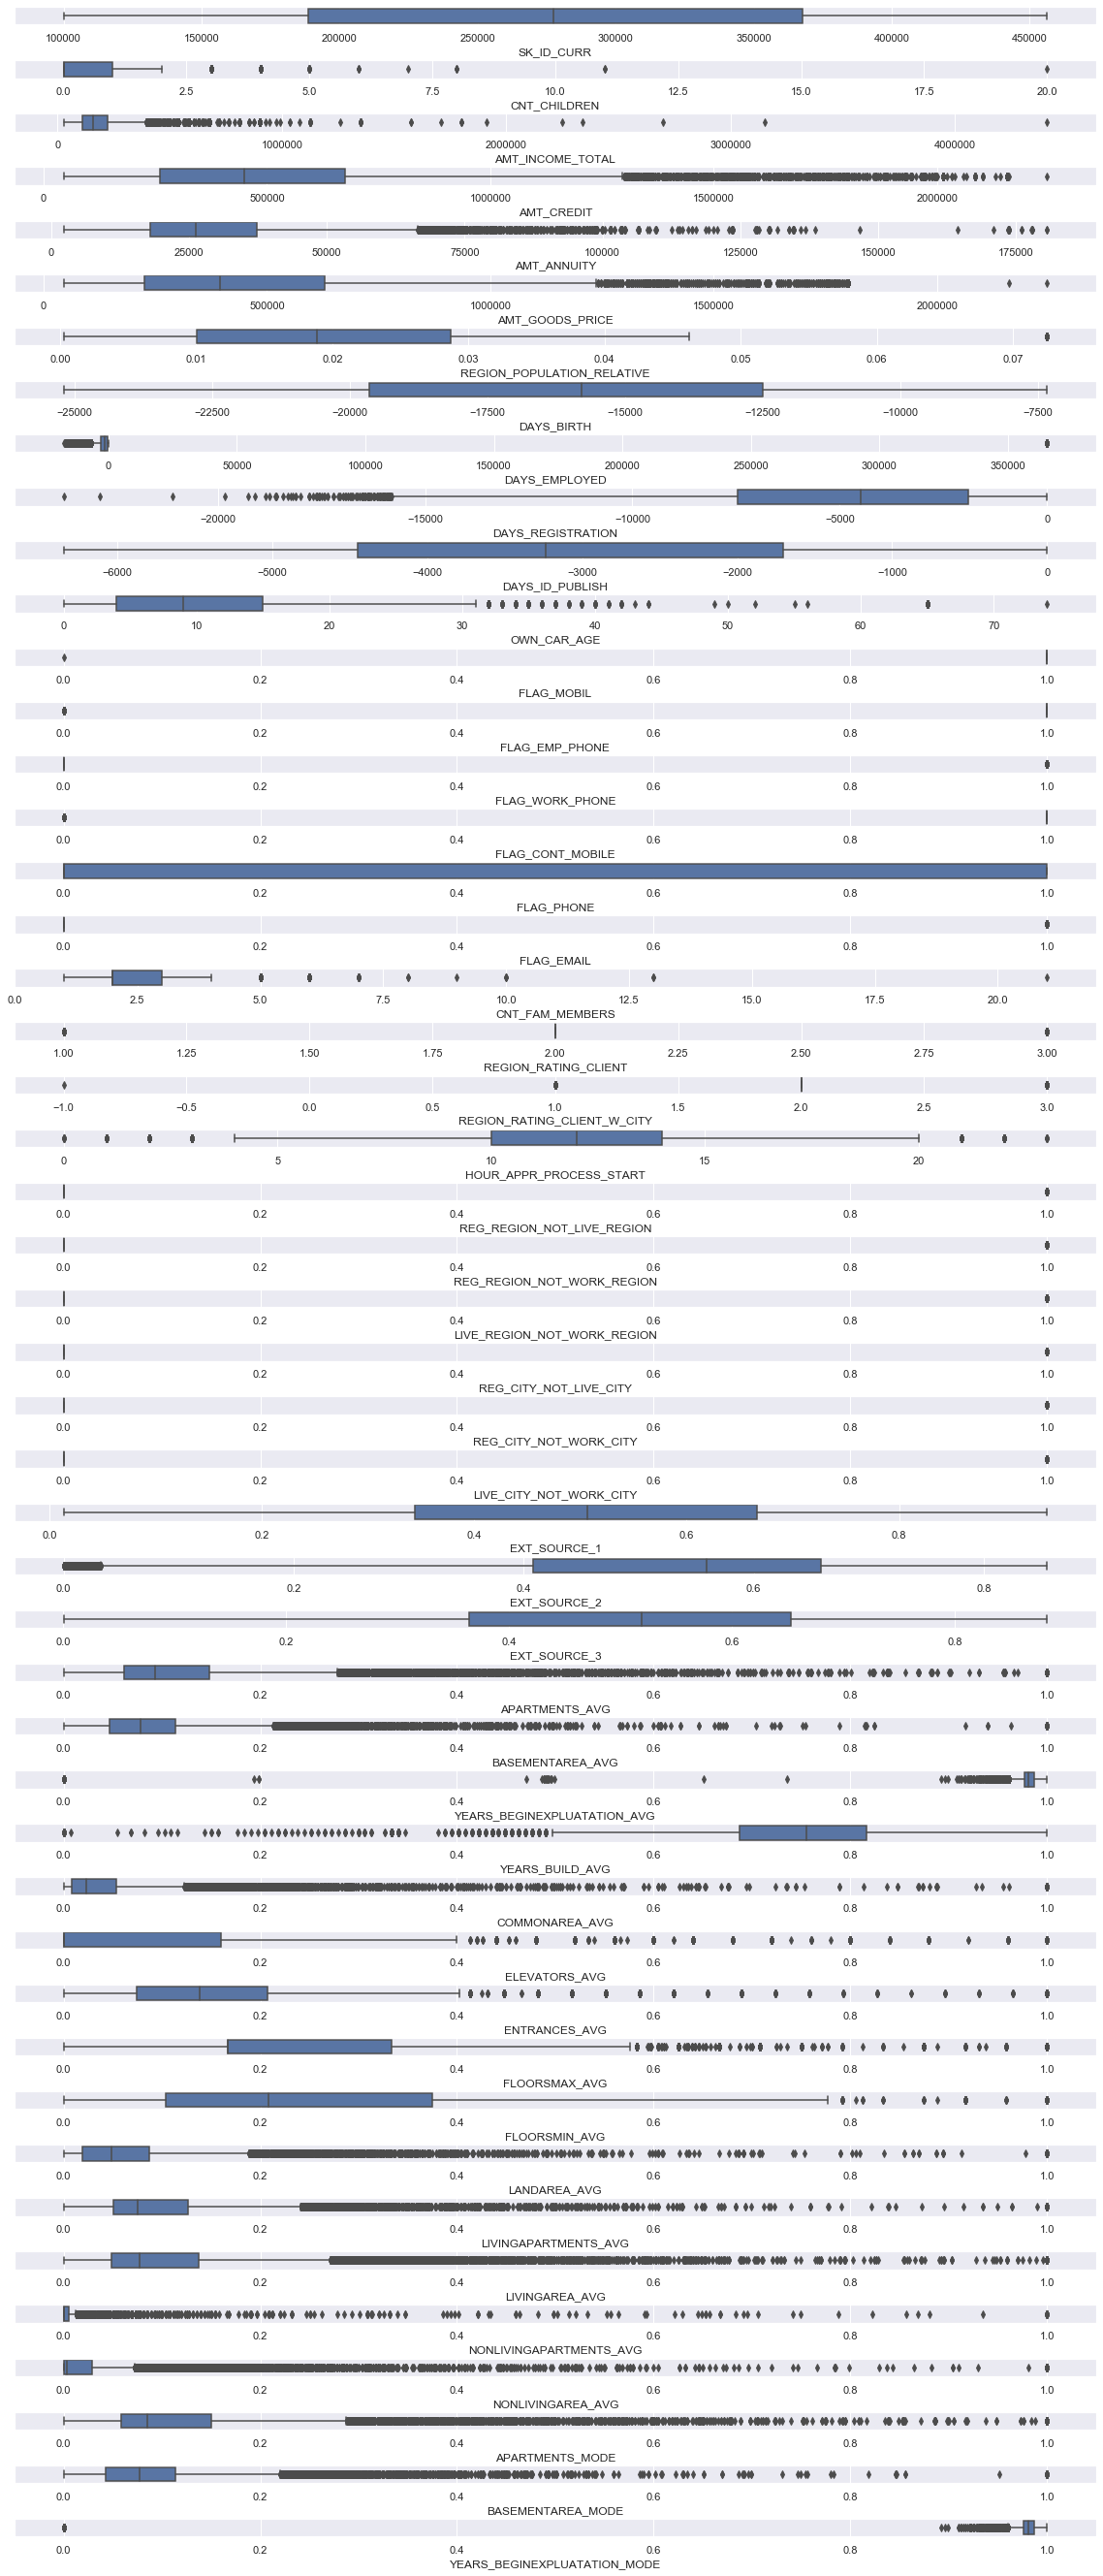

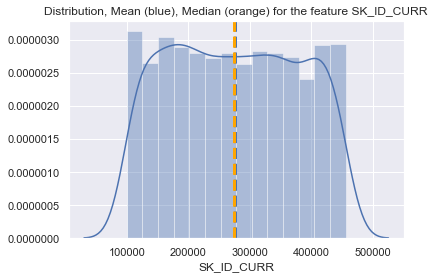

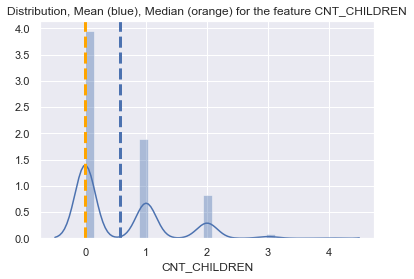

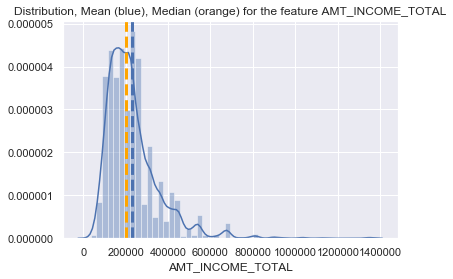

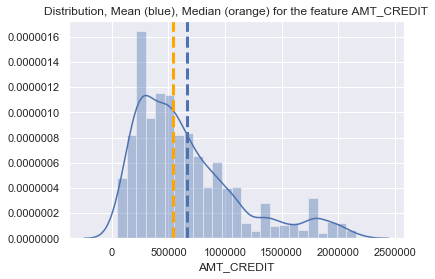

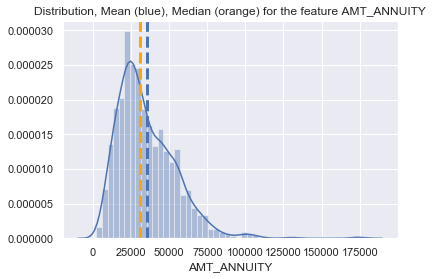

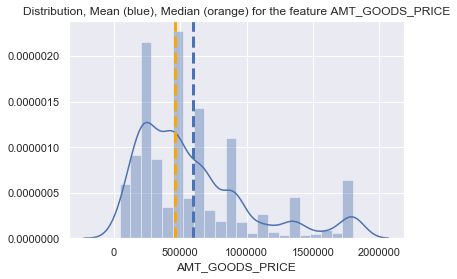

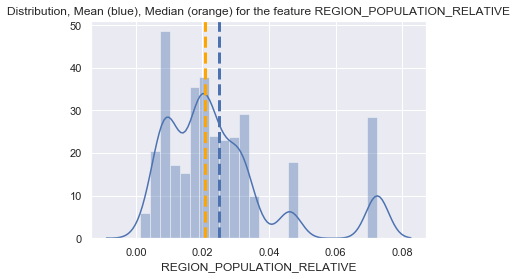

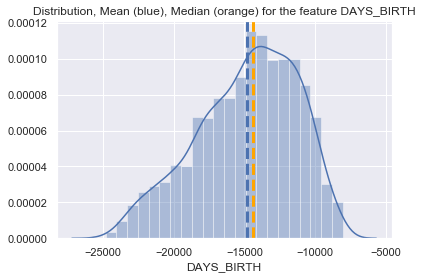

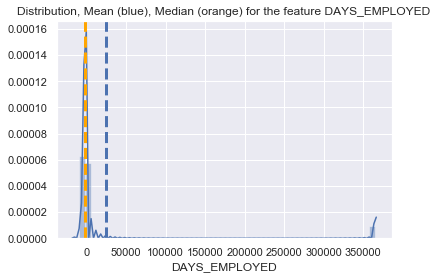

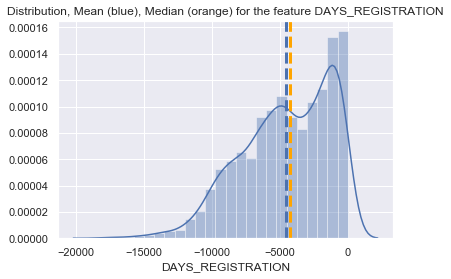

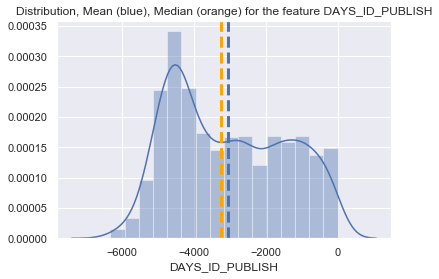

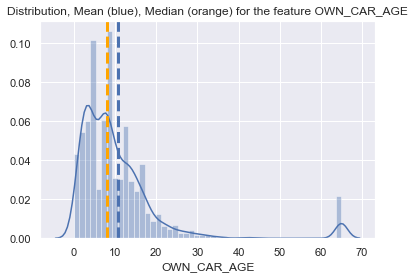

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


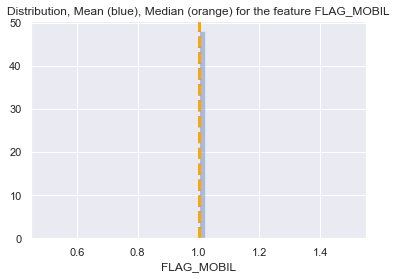

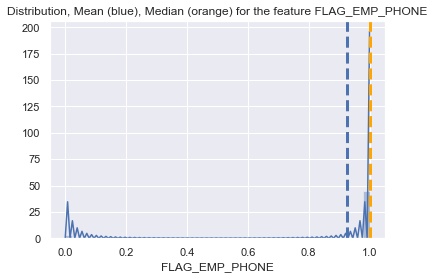

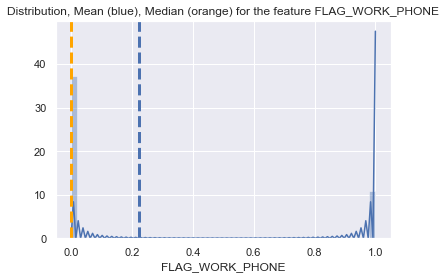

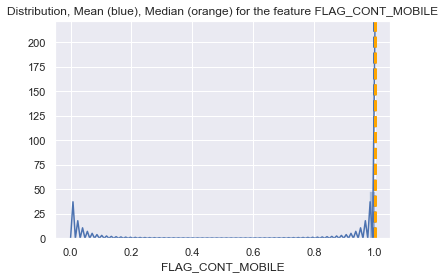

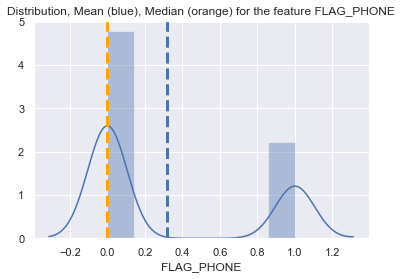

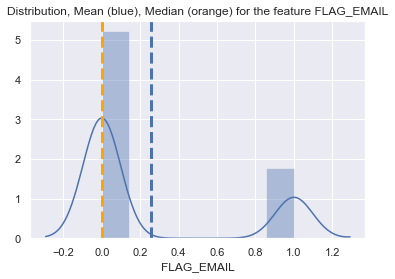

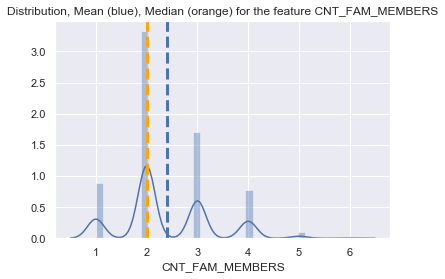

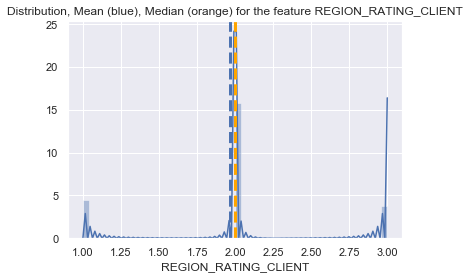

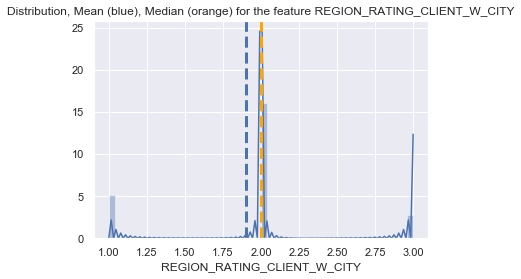

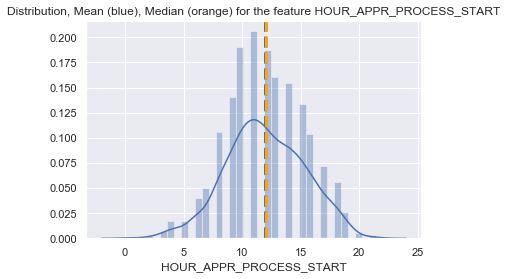

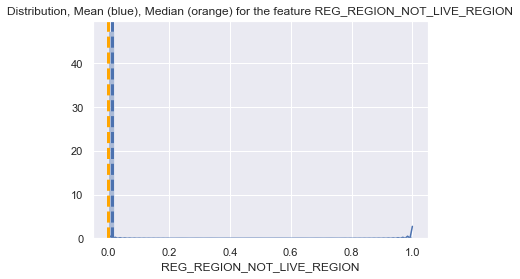

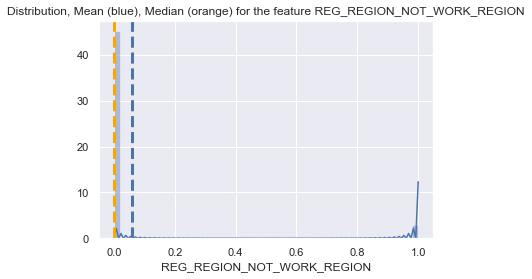

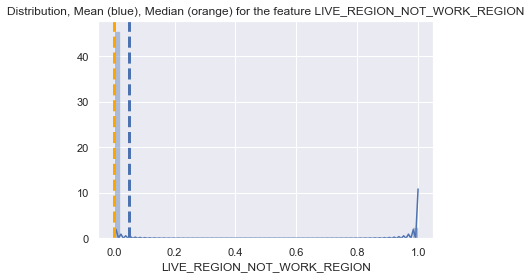

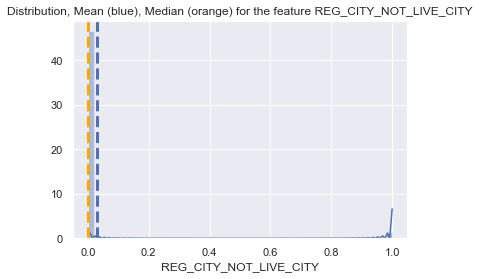

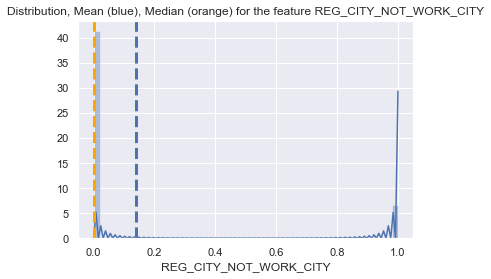

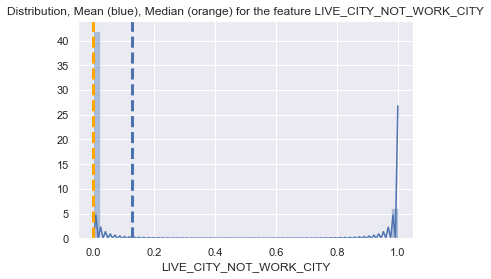

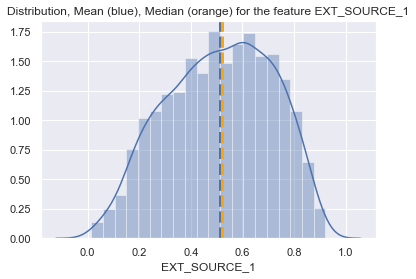

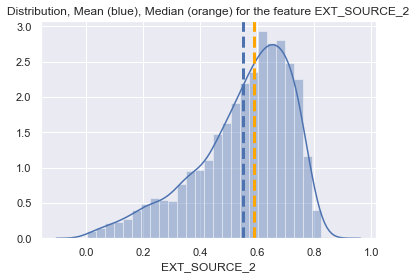

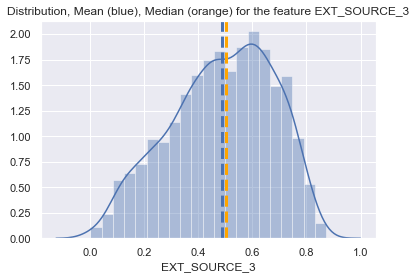

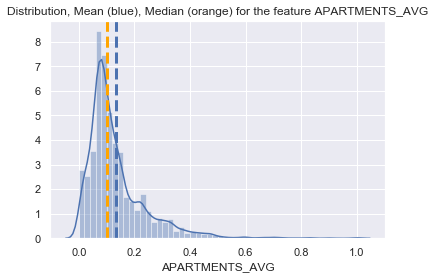

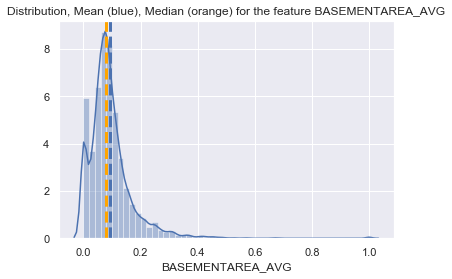

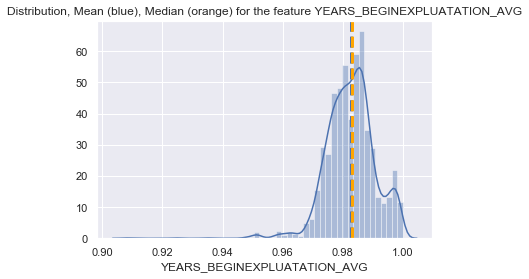

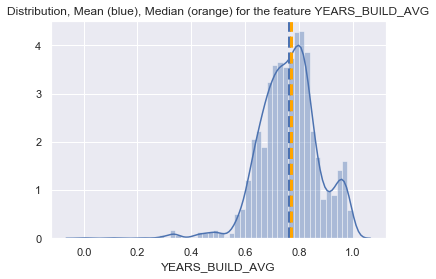

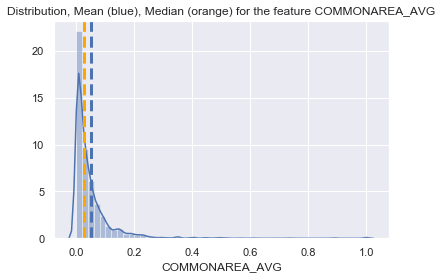

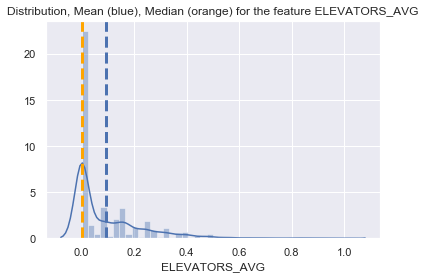

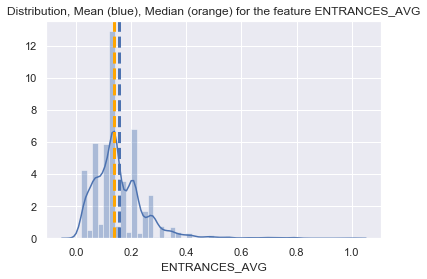

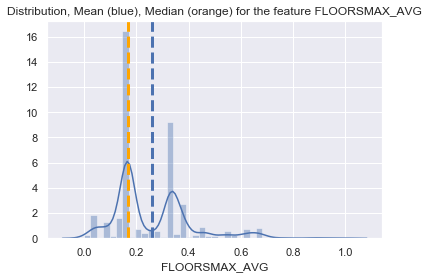

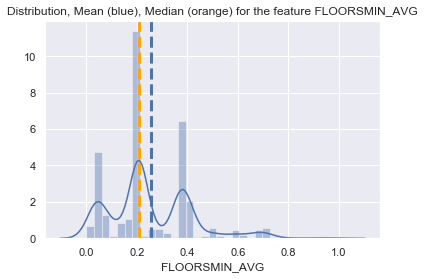

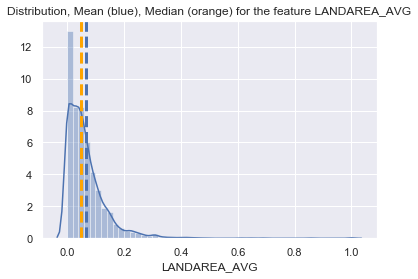

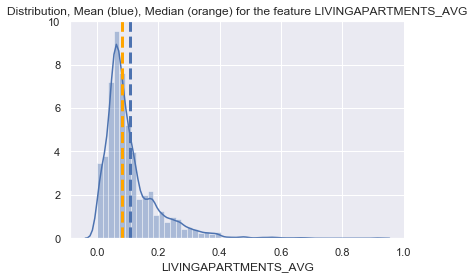

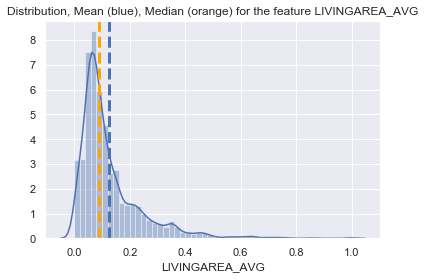

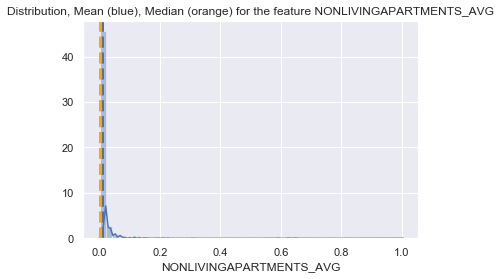

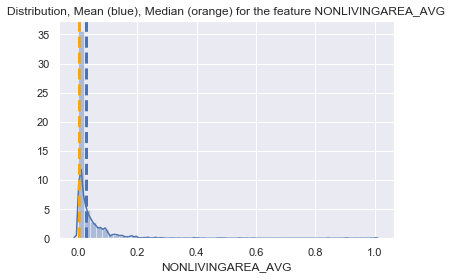

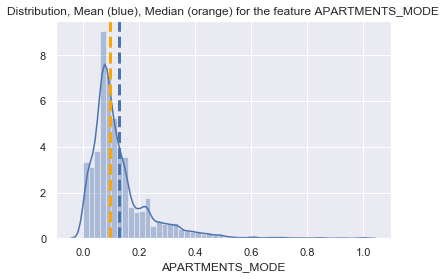

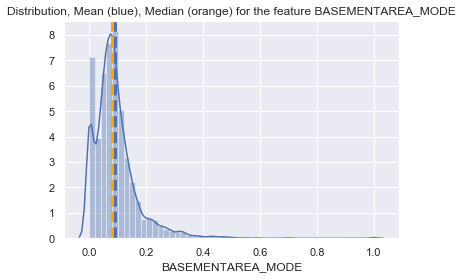

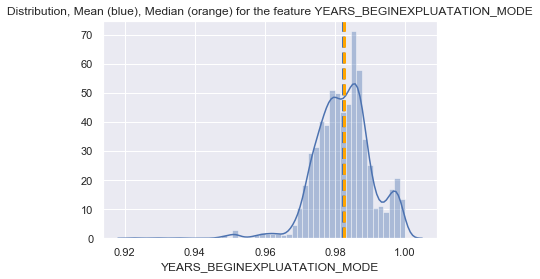

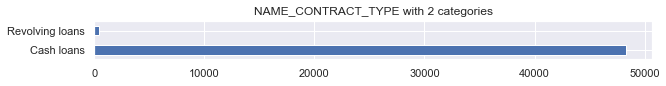

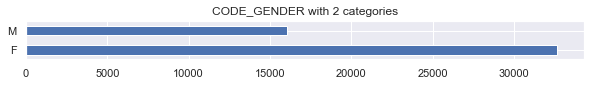

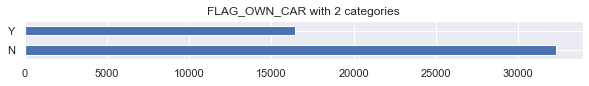

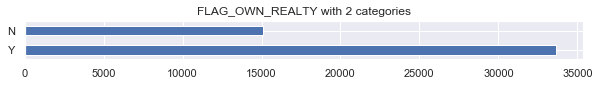

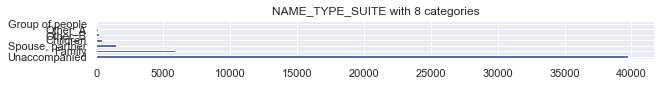

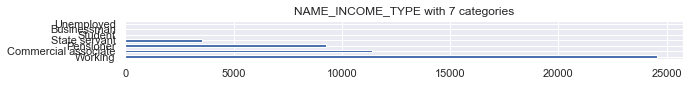

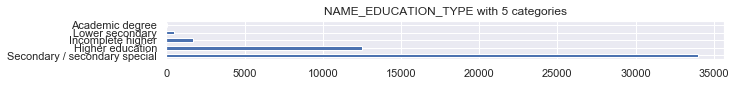

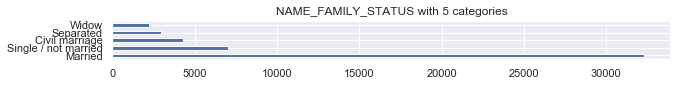

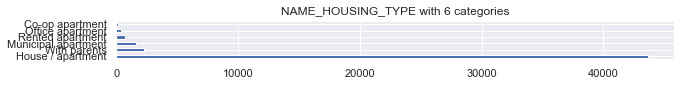

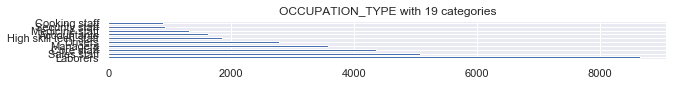

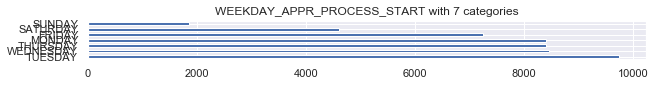

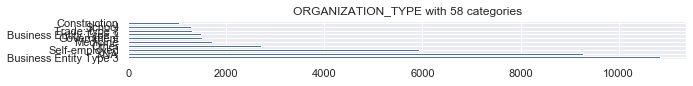

In [3]:
data1_firsthalf = data1[data1.columns[0:60]]
data1_lasthalf = data1[data1.columns[60:122]]
# Analysis first half of the columns of data1
Full_Analysis_df(data1_firsthalf,'Data1 first half')

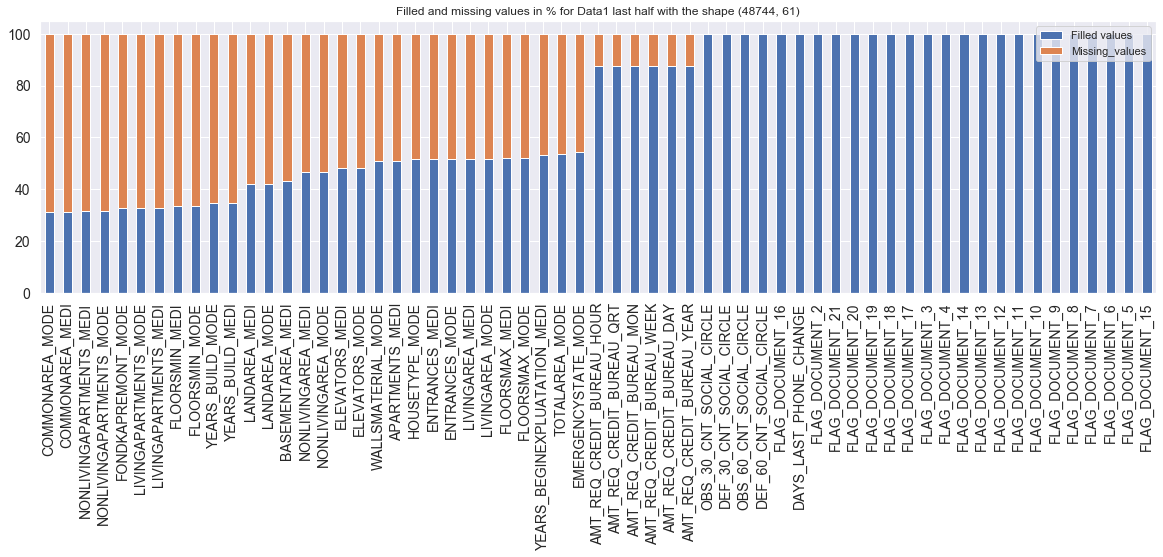

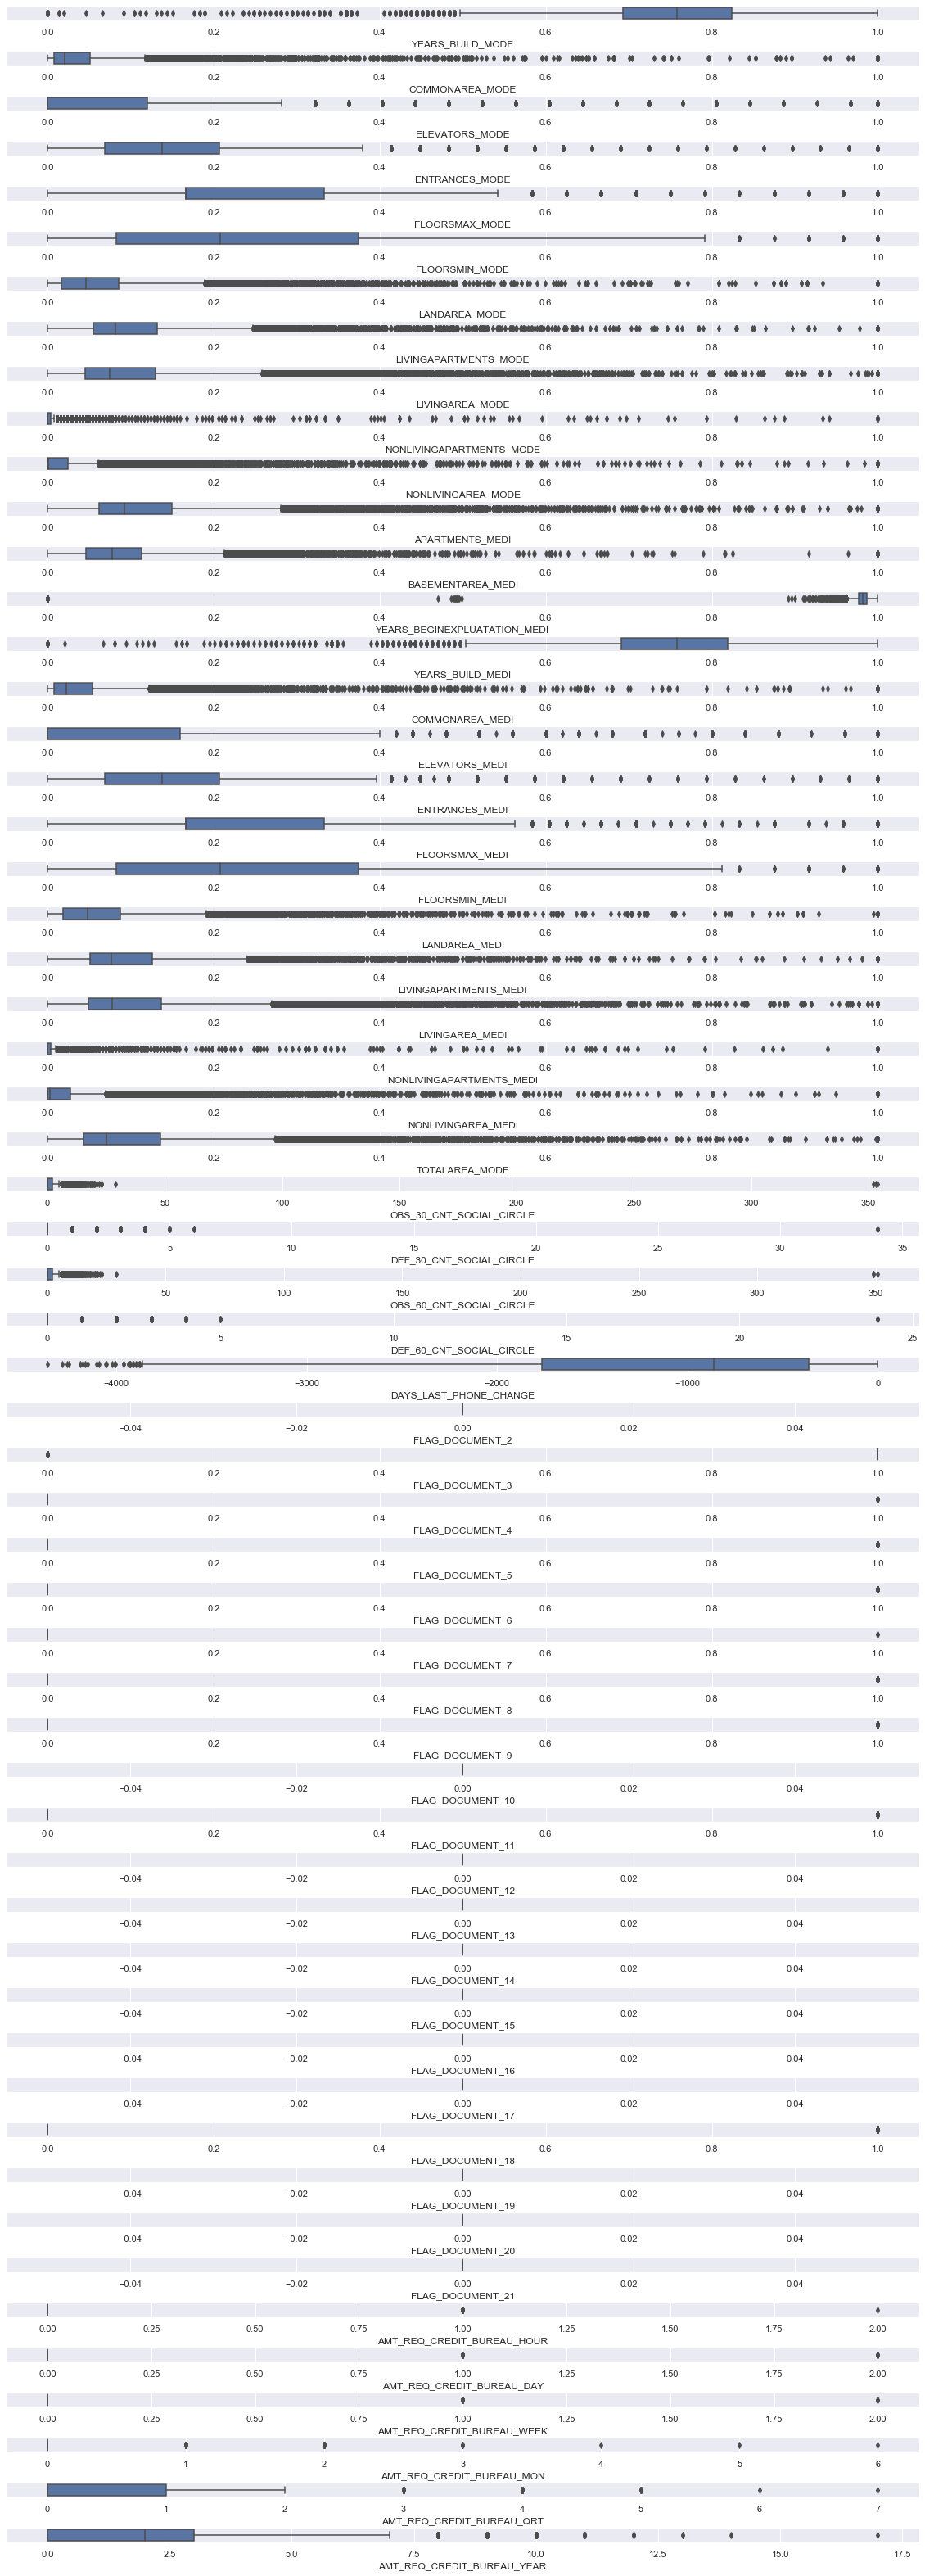

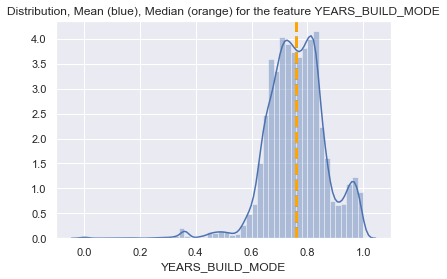

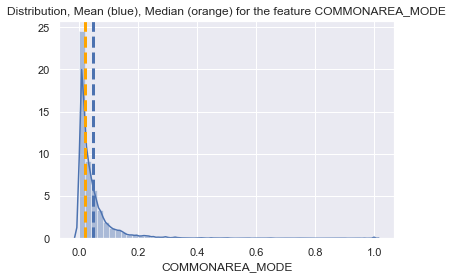

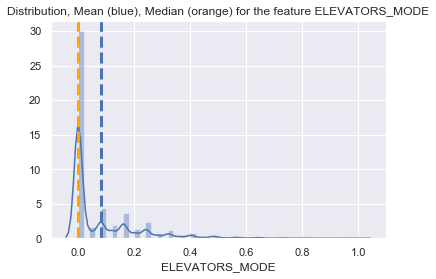

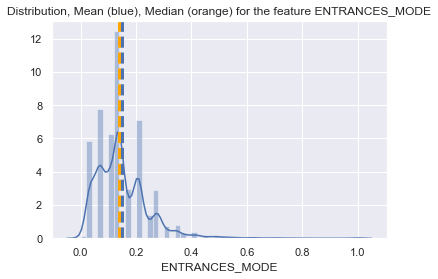

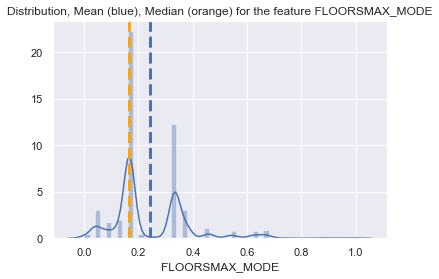

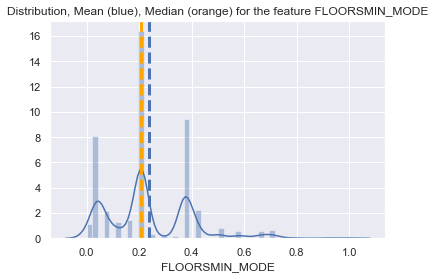

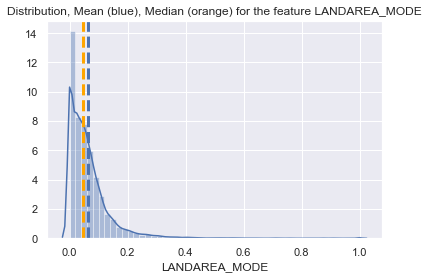

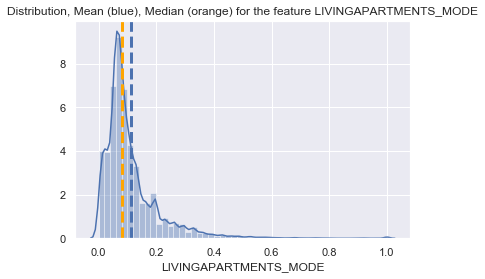

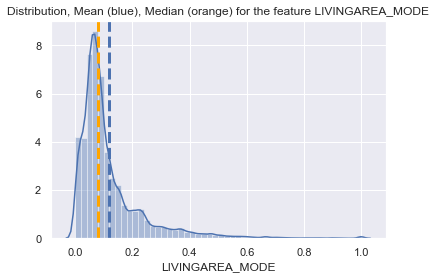

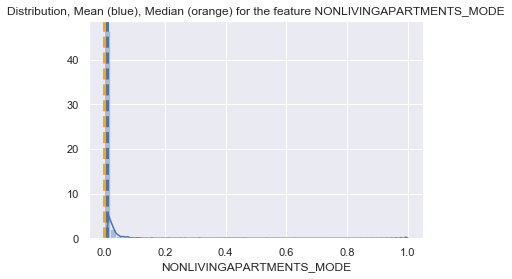

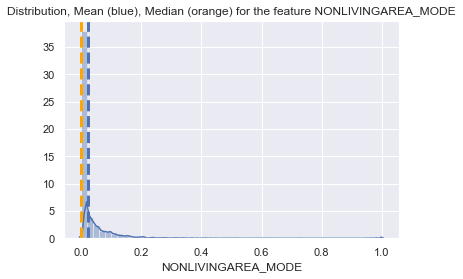

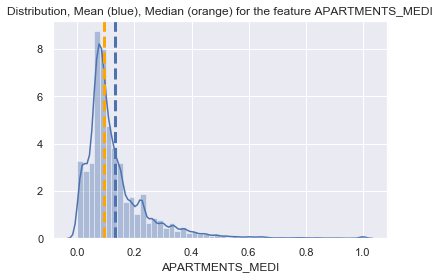

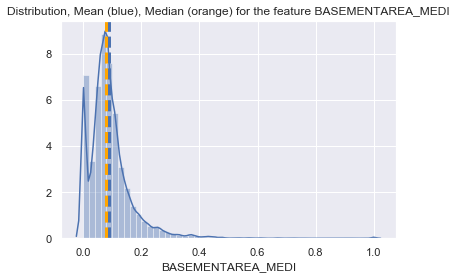

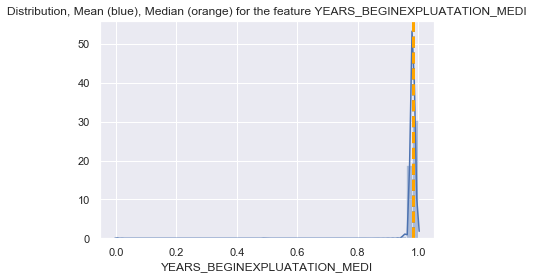

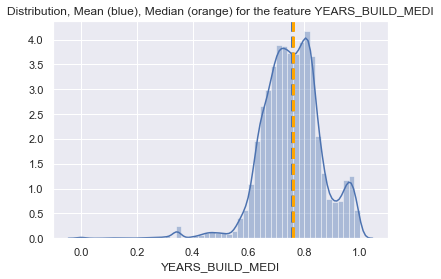

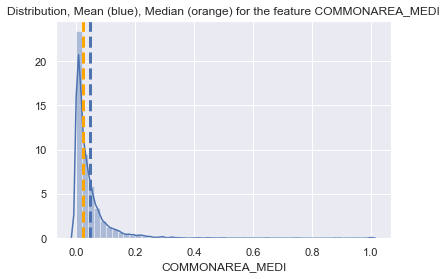

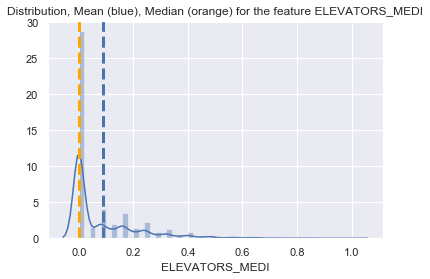

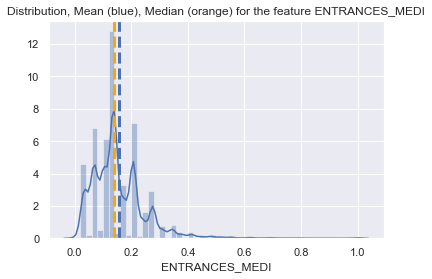

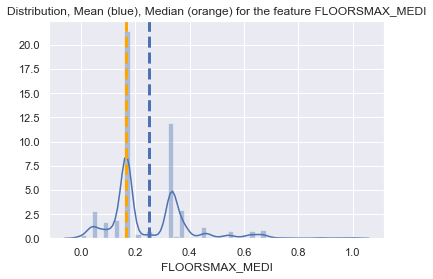

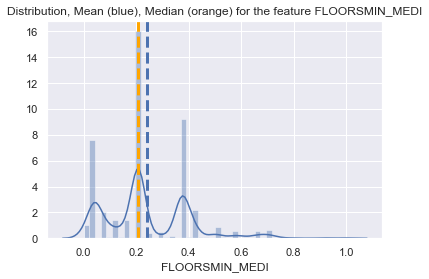

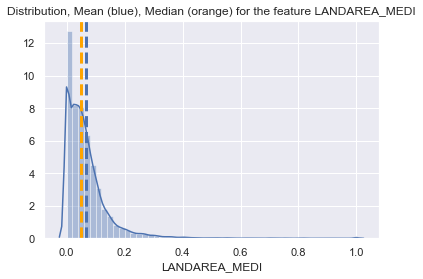

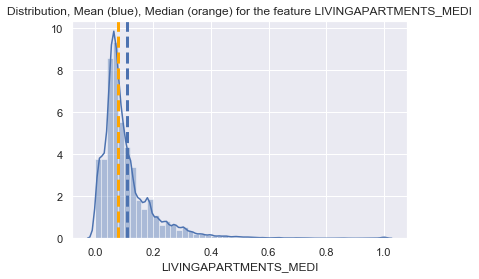

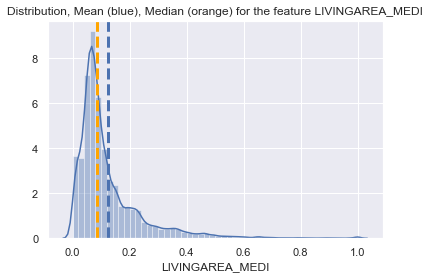

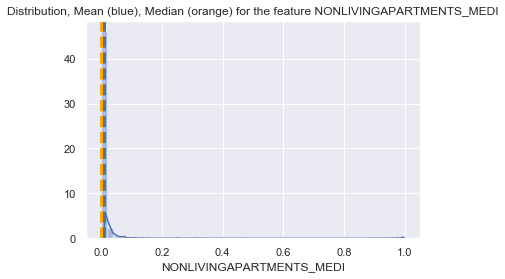

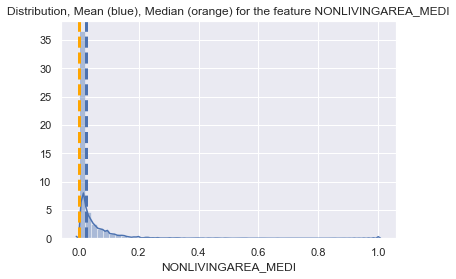

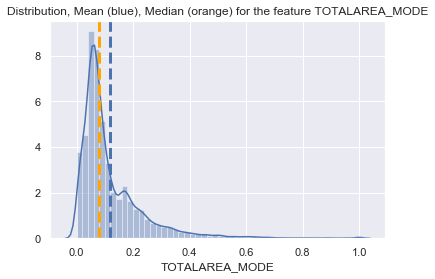

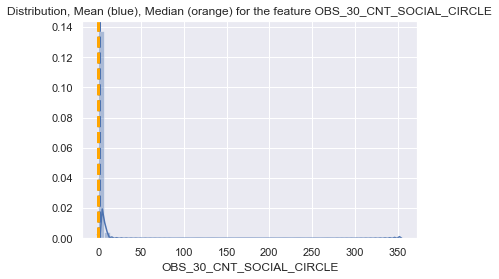

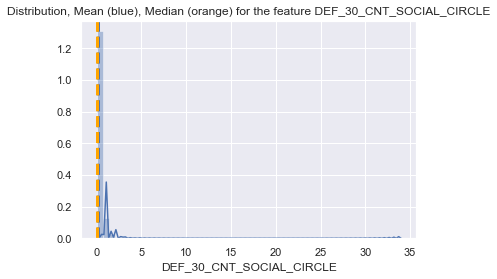

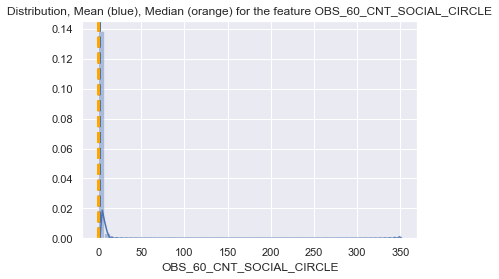

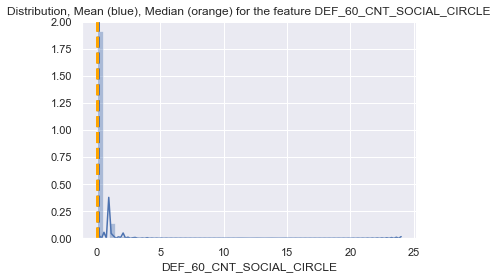

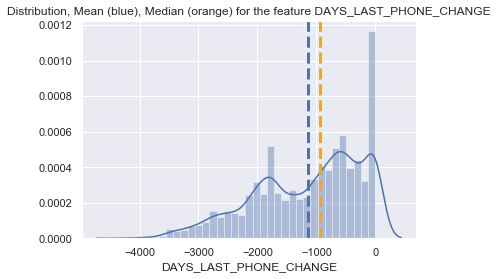

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


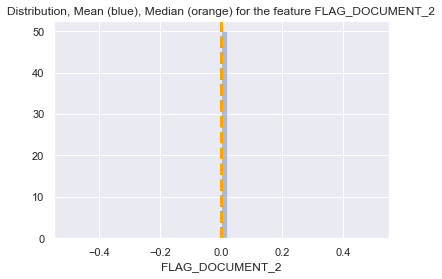

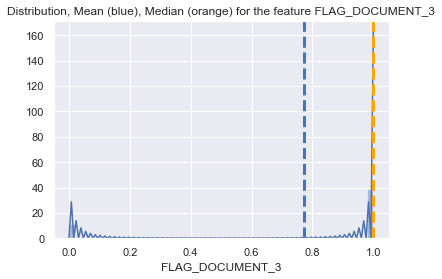

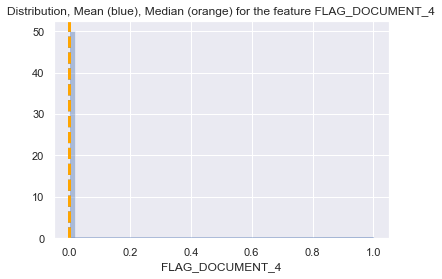

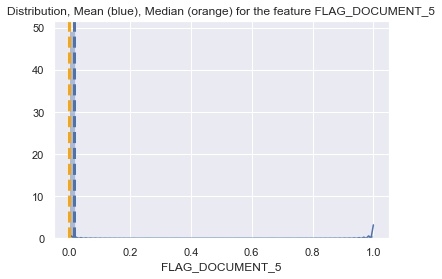

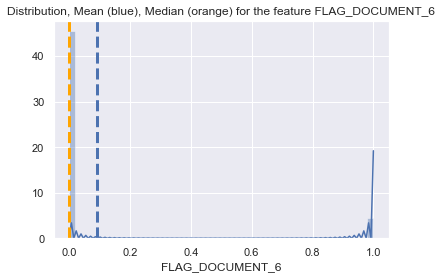

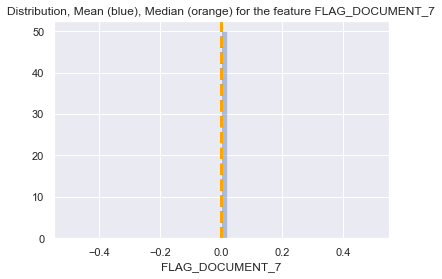

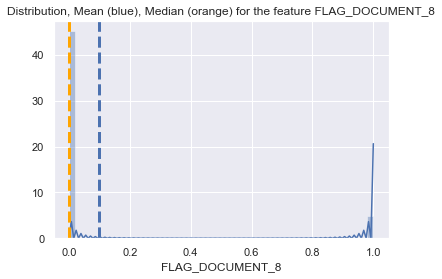

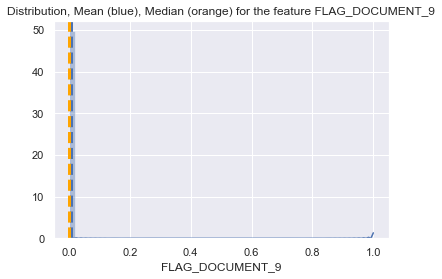

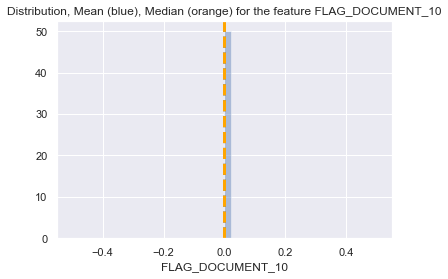

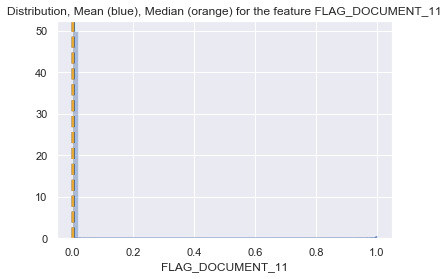

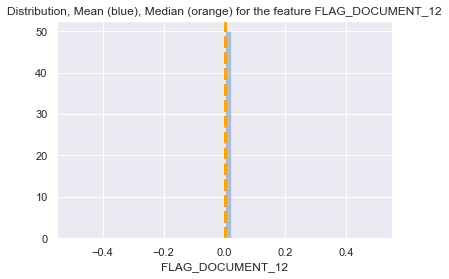

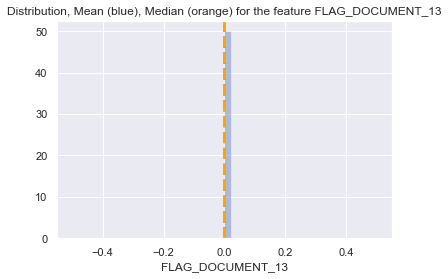

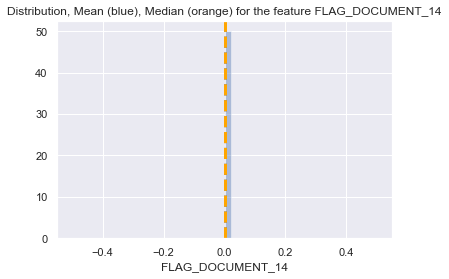

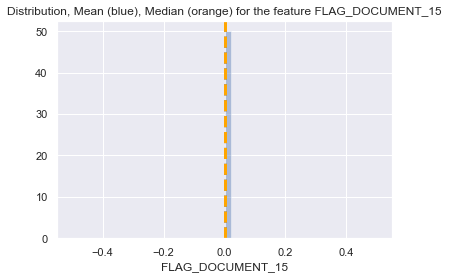

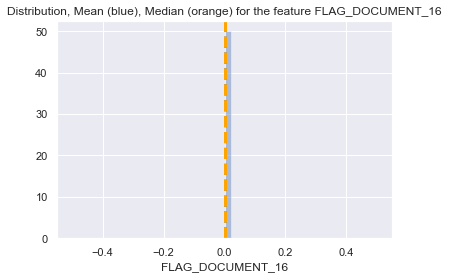

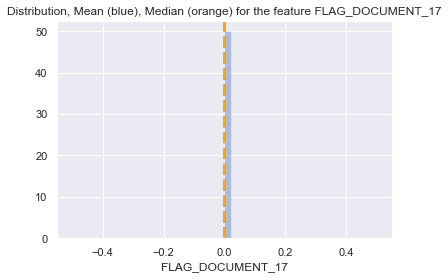

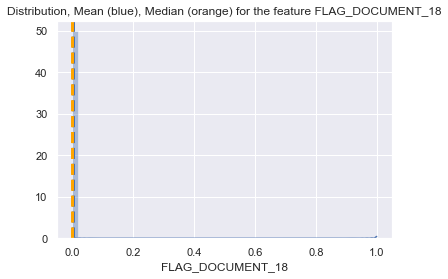

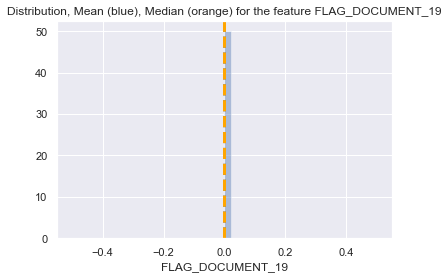

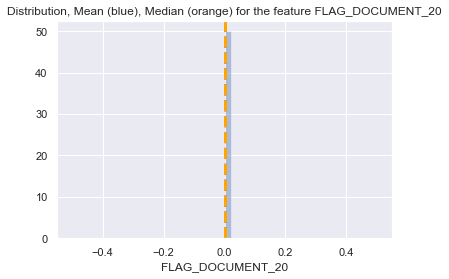

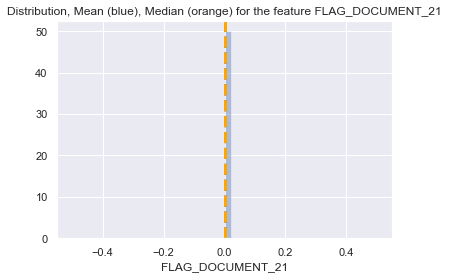

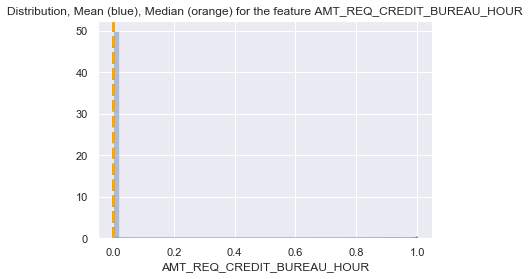

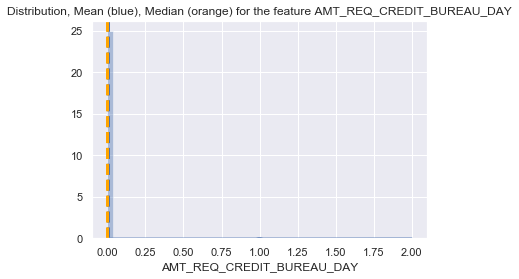

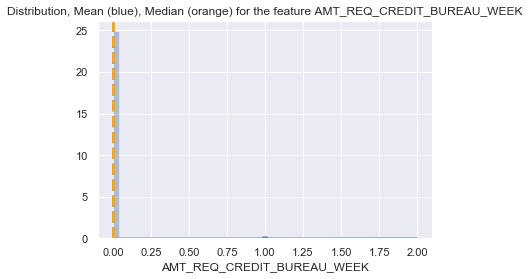

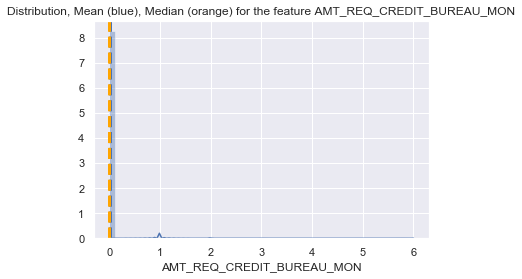

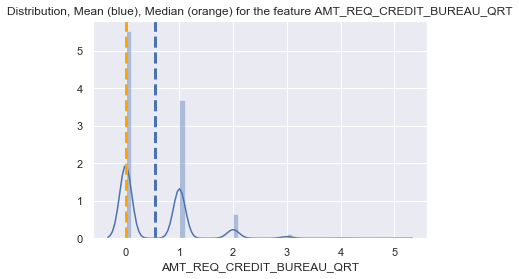

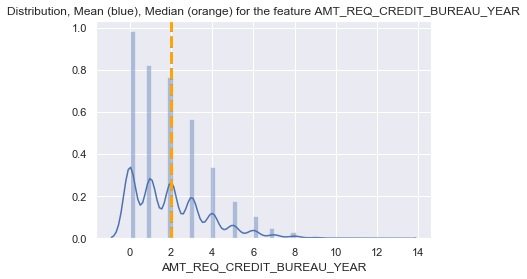

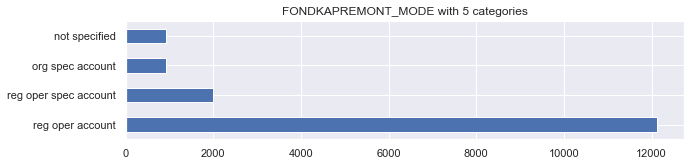

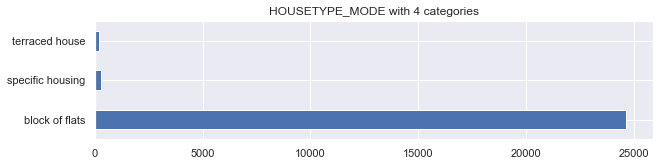

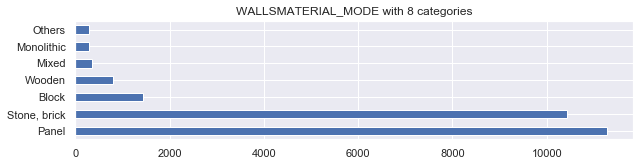

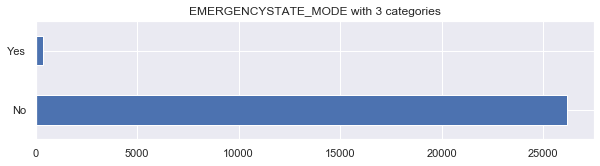

In [4]:
# Analysis first half of the columns of data1
Full_Analysis_df(data1_lasthalf,'Data1 last half')

In [5]:
# after checking the the first half analysis, dropping irrelevant and/or redundant columns for this study
# ex: NAME_FAMILY_STATUS irrelevant there is no id for the partner

data1_drp1 = data1.drop(['CODE_GENDER',
                        'NAME_TYPE_SUITE',
                        'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE',
                        'WEEKDAY_APPR_PROCESS_START',
                        'REGION_POPULATION_RELATIVE',
                         'FLAG_MOBIL',
                         'FLAG_EMP_PHONE',
                         'FLAG_WORK_PHONE',
                         'FLAG_CONT_MOBILE',
                         'FLAG_PHONE',
                         'FLAG_EMAIL',
                         'CNT_FAM_MEMBERS',
                         'REGION_RATING_CLIENT',
                         'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START',
                         'REG_REGION_NOT_LIVE_REGION',
                         'REG_REGION_NOT_WORK_REGION',
                         'LIVE_REGION_NOT_WORK_REGION',
                         'EXT_SOURCE_1',
                         'EXT_SOURCE_2',
                         'EXT_SOURCE_3',
                         'DAYS_LAST_PHONE_CHANGE',
                         'YEARS_BEGINEXPLUATATION_AVG',
                         'YEARS_BUILD_AVG',
                         'APARTMENTS_AVG',
                         'BASEMENTAREA_AVG',
                         'COMMONAREA_AVG',
                         'ELEVATORS_AVG',
                         'ENTRANCES_AVG',
                         'FLOORSMAX_AVG',
                         'FLOORSMIN_AVG',
                         'LANDAREA_AVG',
                         'LIVINGAPARTMENTS_AVG',
                         'LIVINGAREA_AVG',
                         'NONLIVINGAPARTMENTS_AVG',
                         'NONLIVINGAREA_AVG'], axis=1)

In [ ]:
# after checking the last half analysis, dropping irrelevant and/or redundant columns for this study
# dropped FLAG_DOCUMENT are irrelevant
# small feature engineering on the remaining FLAG_DOCUMENT since they represent require documents to get the loan
data1_drp2 = data1_drp1.drop(['APARTMENTS_MEDI',
                              'BASEMENTAREA_MEDI',
                              'YEARS_BEGINEXPLUATATION_MEDI',
                              'YEARS_BUILD_MEDI',
                              'COMMONAREA_MEDI',
                              'ELEVATORS_MEDI',
                              'ENTRANCES_MEDI',
                              'FLOORSMAX_MEDI',
                              'FLOORSMIN_MEDI',
                              'LANDAREA_MEDI',
                              'LIVINGAPARTMENTS_MEDI',
                              'LIVINGAREA_MEDI',
                              'NONLIVINGAPARTMENTS_MEDI',
                              'NONLIVINGAREA_MEDI',
                              'FONDKAPREMONT_MODE',
                              'HOUSETYPE_MODE',
                              'WALLSMATERIAL_MODE',
                              'EMERGENCYSTATE_MODE',
                              'OBS_30_CNT_SOCIAL_CIRCLE',
                              'OBS_60_CNT_SOCIAL_CIRCLE',
                              'FLAG_DOCUMENT_2',
                              'FLAG_DOCUMENT_10',
                              'FLAG_DOCUMENT_12',
                              'FLAG_DOCUMENT_13',
                              'FLAG_DOCUMENT_14',
                              'FLAG_DOCUMENT_15',
                              'FLAG_DOCUMENT_16',
                              'FLAG_DOCUMENT_17',
                              'FLAG_DOCUMENT_19',
                              'FLAG_DOCUMENT_20',
                              'FLAG_DOCUMENT_21',
                              'OCCUPATION_TYPE',
                              'ORGANIZATION_TYPE',
                              'YEARS_BUILD_MODE',
                              'CNT_CHILDREN',
                              'LIVE_CITY_NOT_WORK_CITY',
                              'REG_CITY_NOT_LIVE_CITY',
                              'REG_CITY_NOT_WORK_CITY',
                              'TOTALAREA_MODE',
                              'LANDAREA_MODE',
                              'LIVINGAREA_MODE',
                              'NONLIVINGAREA_MODE',
                              'APARTMENTS_MODE'], axis=1)

data1_drp2['FLAG_DOC_MERGE'] = (data1_drp2['FLAG_DOCUMENT_3'] | 
                                     data1_drp2['FLAG_DOCUMENT_4'] |
                                     data1_drp2['FLAG_DOCUMENT_5'] |
                                     data1_drp2['FLAG_DOCUMENT_6'] | 
                                     data1_drp2['FLAG_DOCUMENT_7'] | 
                                     data1_drp2['FLAG_DOCUMENT_8'] | 
                                     data1_drp2['FLAG_DOCUMENT_9'] | 
                                     data1_drp2['FLAG_DOCUMENT_11'] | 
                                     data1_drp2['FLAG_DOCUMENT_18'])
data1_drp2_flagmer = data1_drp2.drop(['FLAG_DOCUMENT_3',
                                      'FLAG_DOCUMENT_4',
                                      'FLAG_DOCUMENT_5',
                                      'FLAG_DOCUMENT_6',
                                      'FLAG_DOCUMENT_7',
                                      'FLAG_DOCUMENT_8',
                                      'FLAG_DOCUMENT_9',
                                      'FLAG_DOCUMENT_11',
                                      'FLAG_DOCUMENT_18'], axis=1)
data1_drp2_flagmer['FLAG_DOC_MERGE'].unique()
#data1_drp2['FLAG_DOCUMENT_Merge'].unique()